# Final project

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Loading data

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [56]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [57]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


## Creating Vis

In [58]:
df_year_sales = df.groupby('Year')['Automobile_Sales'].mean()

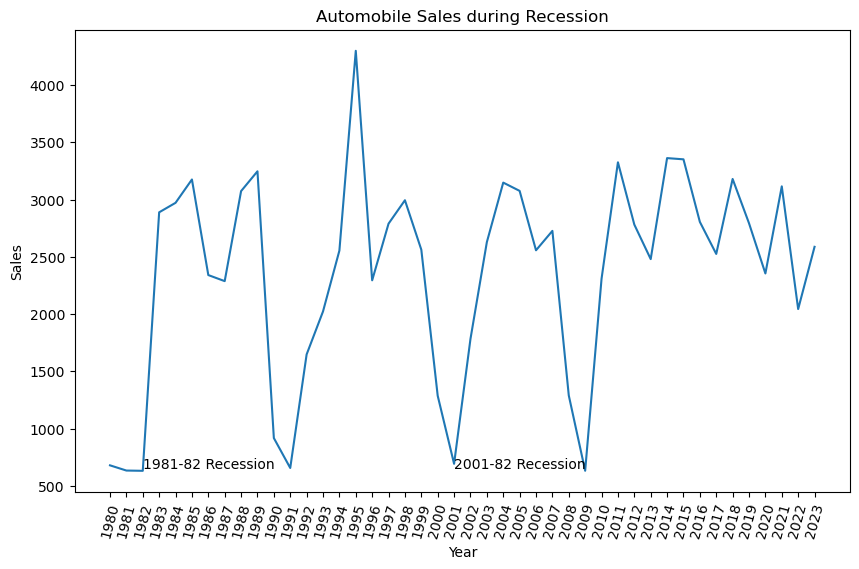

In [59]:
plt.figure(figsize=(10,6))
df_year_sales.plot(kind='line')
plt.title('Automobile Sales during Recession')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1982, 650, '1981-82 Recession')
plt.text(2001, 650, '2001-82 Recession')
plt.show()

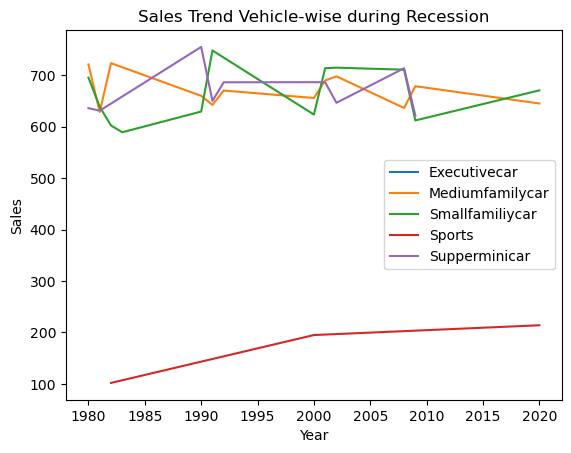

In [60]:
df_rec = df[df['Recession'] == 1]
df_mline = df_rec.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_mline.set_index('Year', inplace=True)
df_mline = df_mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_mline.plot(kind='line')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

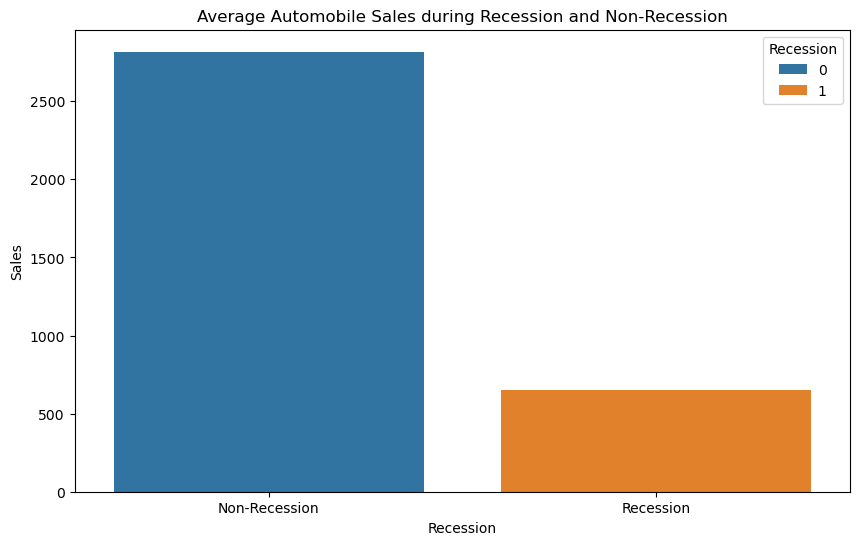

In [61]:
df_bar = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=df_bar)
plt.xlabel('Recession')
plt.ylabel('Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

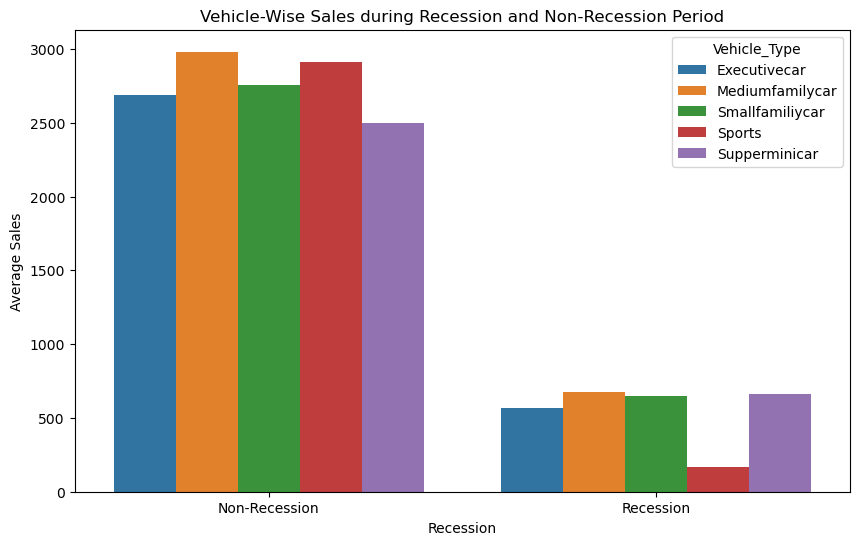

In [66]:
df_new = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=df_new)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

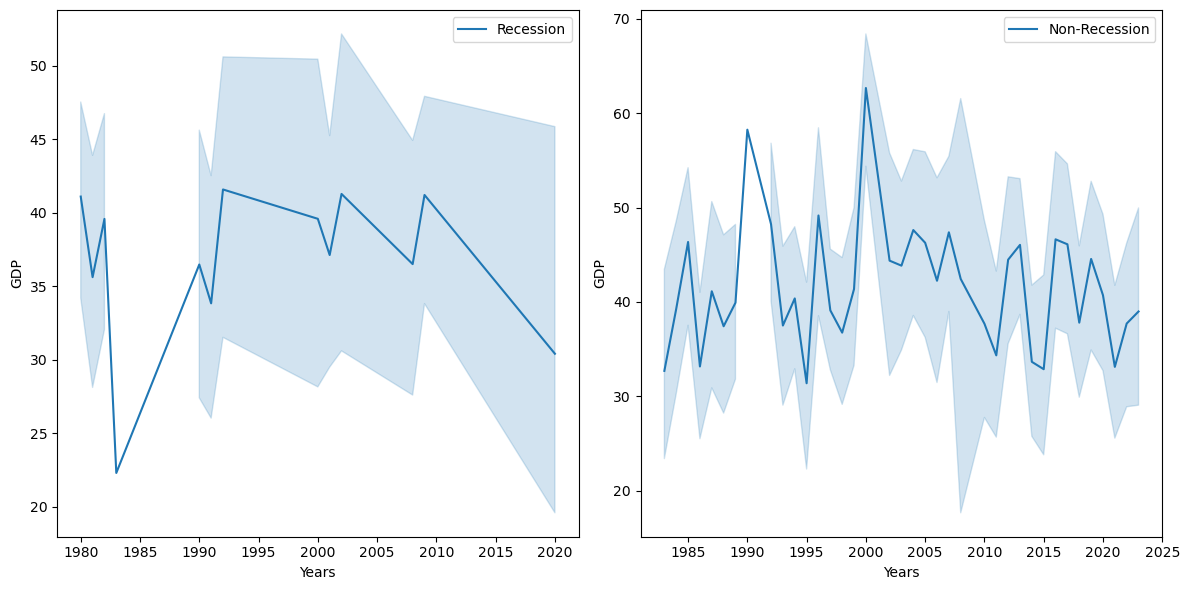

In [69]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

plt.figure(figsize=(12, 6))
    
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.legend()

plt.tight_layout()
plt.show()

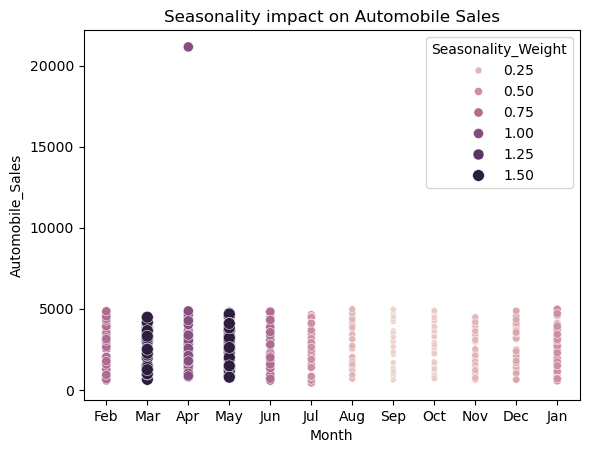

In [78]:
non_rec_data = df[df['Recession'] == 0]
size=non_rec_data['Seasonality_Weight']
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight')

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

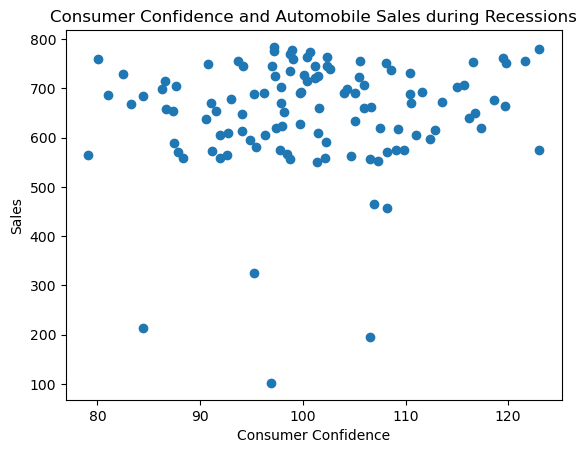

In [80]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer Confidence')
plt.ylabel('Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

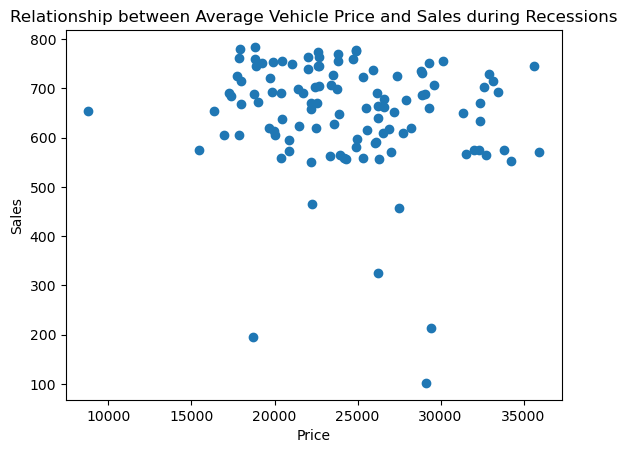

In [81]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

<Figure size 800x600 with 0 Axes>

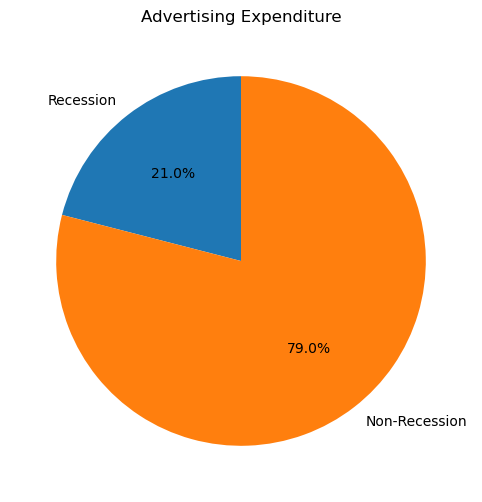

In [83]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

rec_ad_total = rec_data['Advertising_Expenditure'].sum()
non_rec_ad_total = non_rec_data['Advertising_Expenditure'].sum()
 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [rec_ad_total, non_rec_ad_total]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure')
plt.show()

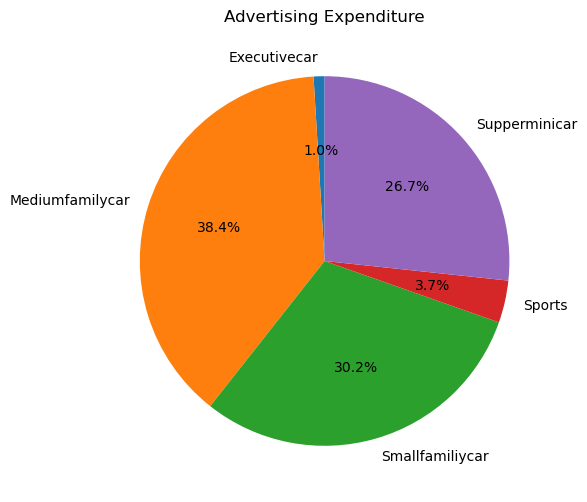

In [87]:
rec_data = df[df['Recession'] == 1]

ad_total = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

 
plt.figure(figsize=(8, 6))

labels = ad_total.index
sizes = ad_total.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure')
plt.show()

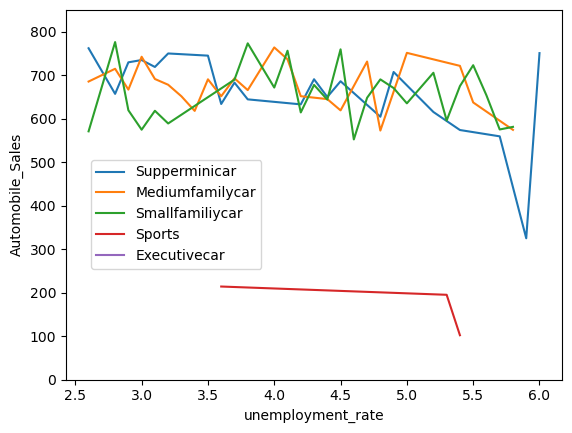

In [92]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
plt.show()

In [101]:
import requests as re
import json

def download(url, filename):
    response = re.get(url)
    if response.status_code == 200:
        data = response.json()
        with open(filename, "w") as f:
            json.dump(data,f,indent=4)

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
download(path, "us-states.json")

filename = "us-states.json"

In [103]:
recession_data = df[df['Recession'] == 1]
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

map1